# Data Preprocessing and Neural Network Model

In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from scipy.stats import kendalltau


In [386]:
root = 'data/'
results_merged = pd.read_csv(root + 'results_merged.csv')
circuits = pd.read_csv(root + 'circuits.csv')
drivers = pd.read_csv(root + 'drivers.csv')

/var/folders/gy/c72q5khn4jv42tkd5s9tmlkr0000gn/T/ipykernel_9678/2233068382.py:2: DtypeWarning: Columns (4,31) have mixed types. Specify dtype option on import or set low_memory=False.
  results_merged = pd.read_csv(root + 'results_merged.csv')


In [387]:
# Drop rows with missing values
drivers.replace('\\N', pd.NA, inplace=True)
drivers.dropna(inplace=True)

In [388]:
# Display the information of the dataframe
results_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time_x           26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

In [389]:
# Display the first few rows of the dataframe
results_merged.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,status,year,round,circuitId,name_x,date,time_y,circuitRef,name_y,location,country,lat,lng,alt,url_y
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,Finished,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,Finished,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,Finished,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,Finished,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,Finished,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


In [390]:
# Display the information of the dataframe
results_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time_x           26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

In [391]:
# Display the shape of the dataframe
results_merged.shape

(26080, 33)

In [392]:
# Drop rows that we don't need
results_merged.drop(['number', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'raceId',
       'fastestLapSpeed', 'status', 'round', 'name_x', 'date', 'time_y', 'circuitRef', 'name_y', 'location',
       'country',  'url_y', 'lat', 'lng', 'resultId' ], axis=1, inplace=True)

In [393]:
# Display the dataframe
pd.set_option('display.max_columns', None)
results_merged.head()

,driverId,constructorId,grid,position,statusId,year,circuitId,alt
0,1,1,1,1,1,2008,1,10
1,2,2,5,2,1,2008,1,10
2,3,3,7,3,1,2008,1,10
3,4,4,11,4,1,2008,1,10
4,5,1,3,5,1,2008,1,10


In [394]:
# Change "\N" in position to 100
results_merged['position'] = results_merged['position'].replace('\\N', '35')

In [395]:
# Display the unique values of the position column
results_merged['position'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '35', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '23',
       '27', '30', '24', '26', '25', '32', '28', '29', '31', '22', '33'],
      dtype=object)

In [396]:
# Replace the '\\N' values in the position column as missing values
results_merged.replace('\\N', pd.NA, inplace=True)

In [397]:
# Show the sum of all missing values in the dataframe
results_merged.isna().sum()

driverId          0
constructorId     0
grid              0
position          0
statusId          0
year              0
circuitId         0
alt              60
dtype: int64

In [398]:
# Drop rows with missing values
results_merged.dropna(inplace=True)

In [399]:
# Display the information of the dataframe
results_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26020 entries, 0 to 26079
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   driverId       26020 non-null  int64 
 1   constructorId  26020 non-null  int64 
 2   grid           26020 non-null  int64 
 3   position       26020 non-null  object
 4   statusId       26020 non-null  int64 
 5   year           26020 non-null  int64 
 6   circuitId      26020 non-null  int64 
 7   alt            26020 non-null  object
dtypes: int64(6), object(2)
memory usage: 1.8+ MB


In [401]:
# Define features and target variable
features = ['driverId', 'constructorId', 'grid', 'statusId', 'year', 'circuitId', 'alt']
target = 'position'

In [402]:
# Split the features into numerical and categorical
numeric_features = ['grid', 'statusId', 'year', 'alt']
categorical_features = ['driverId', 'constructorId', 'circuitId'] 

In [403]:
# Define the preprocessing pipelines for both numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [404]:
# Split the dataset into train and test sets
X = results_merged[features]
y = results_merged[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [405]:
# Fit the preprocessing pipeline and transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [406]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_processed.astype('float32').toarray())
y_train_tensor = torch.tensor(y_train.astype('float32').values.reshape(-1, 1))
X_test_tensor = torch.tensor(X_test_processed.astype('float32').toarray())
y_test_tensor = torch.tensor(y_test.astype('float32').values.reshape(-1, 1))

In [407]:
# Define the model architecture
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        # self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        # x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [408]:
# Initialize the model
model = RegressionModel(X_train_tensor.shape[1])

In [409]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [410]:
# Train the model
num_epochs = 100
batch_size = 32
losses = []
for epoch in range(num_epochs):
    epoch_loss = []
    for i in range(0, len(X_train_tensor), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        targets = y_train_tensor[i:i+batch_size]
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = torch.sqrt(criterion(outputs, targets))
        loss.backward()
        optimizer.step()
        epoch_loss.append(loss.item())
    losses.append(np.mean(epoch_loss))

    print(f'Epoch [{epoch+1}/{num_epochs}], RMSE Loss: {loss.item():.4f}')

Epoch [1/100], RMSE Loss: 11.9751
Epoch [2/100], RMSE Loss: 11.7352
Epoch [3/100], RMSE Loss: 11.4199
Epoch [4/100], RMSE Loss: 11.1932
Epoch [5/100], RMSE Loss: 11.0548
Epoch [6/100], RMSE Loss: 10.9498
Epoch [7/100], RMSE Loss: 10.8563
Epoch [8/100], RMSE Loss: 10.7665
Epoch [9/100], RMSE Loss: 10.6822
Epoch [10/100], RMSE Loss: 10.5818
Epoch [11/100], RMSE Loss: 10.4847
Epoch [12/100], RMSE Loss: 10.3804
Epoch [13/100], RMSE Loss: 10.2703
Epoch [14/100], RMSE Loss: 10.1762
Epoch [15/100], RMSE Loss: 10.0787
Epoch [16/100], RMSE Loss: 9.9795
Epoch [17/100], RMSE Loss: 9.8836
Epoch [18/100], RMSE Loss: 9.8115
Epoch [19/100], RMSE Loss: 9.7185
Epoch [20/100], RMSE Loss: 9.6180
Epoch [21/100], RMSE Loss: 9.5426
Epoch [22/100], RMSE Loss: 9.4655
Epoch [23/100], RMSE Loss: 9.3913
Epoch [24/100], RMSE Loss: 9.3472
Epoch [25/100], RMSE Loss: 9.2976
Epoch [26/100], RMSE Loss: 9.2169
Epoch [27/100], RMSE Loss: 9.1432
Epoch [28/100], RMSE Loss: 9.0700
Epoch [29/100], RMSE Loss: 8.9975
Epoch [3

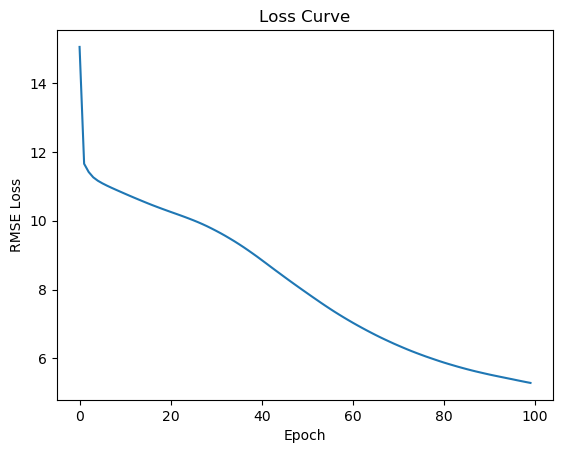

In [411]:
# Plot the loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('RMSE Loss')
plt.title('Loss Curve')
plt.show()

In [412]:
# Evaluate the model
with torch.no_grad():
    y_pred = model(X_test_tensor)
    rmse = np.sqrt(criterion(y_pred, y_test_tensor))
    print(f"Root Mean Squared Error: {rmse:.4f}")

Root Mean Squared Error: 7.6940


In [456]:
# Find the index of the row with year 2023 in X_test_tensor
year2023_X = results_merged[results_merged['year'] == 2023][features].iloc[:20]
year2023_Y = results_merged[results_merged['year'] == 2023][target].iloc[:20]
year2023_X_processed = preprocessor.transform(year2023_X)
year2023_X_tensor = torch.tensor(year2023_X_processed.astype('float32').toarray())
year2023_Y_tensor = torch.tensor(year2023_Y.astype('float32').values.reshape(-1, 1))

with torch.no_grad():
    y_pred = model(year2023_X_tensor)
    rmse = np.sqrt(criterion(y_pred, year2023_Y_tensor))
    print(f"Root Mean Squared Error: {rmse:.4f}")

ordered_pred = y_pred.numpy().flatten().copy()
ordered_pred.sort()
predicted_position = []
for i in range(len(y_pred)):
    position = np.argwhere(ordered_pred == y_pred.numpy().flatten()[i])[0][0] + 1
    predicted_position.append(position)

year2023_driverIds = year2023_X['driverId']
filtered_drivers = []
for driverId in year2023_driverIds:
    filtered_drivers.append(drivers[drivers['driverId'] == driverId]['forename'].values[0] + ' ' + drivers[drivers['driverId'] == driverId]['surname'].values[0])

prediction_results = pd.DataFrame({'DriverId': year2023_X['driverId'], 
                                   'DriverName': np.array(filtered_drivers),
                                   'CircuitId': year2023_X['circuitId'], 
                                   'Actual': year2023_Y_tensor.numpy().flatten(), 
                                   'Predicted': np.array(predicted_position)})
prediction_results['Actual'] = prediction_results['Actual'].astype(int)
prediction_results

Root Mean Squared Error: 5.3450


,DriverId,DriverName,CircuitId,Actual,Predicted
25840,830,Max Verstappen,3,1,1
25841,815,Sergio Pérez,3,2,2
25842,4,Fernando Alonso,3,3,4
25843,832,Carlos Sainz,3,4,5
25844,1,Lewis Hamilton,3,5,3
25845,840,Lance Stroll,3,6,8
25846,847,George Russell,3,7,6
25847,822,Valtteri Bottas,3,8,11
25848,842,Pierre Gasly,3,9,14
25849,848,Alexander Albon,3,10,10


In [457]:
# Calculate Kendall's Tau Coefficient between the actual and predicted positions as a measure of accuracy and print the RMSE
tau, _ = kendalltau(prediction_results['Actual'], prediction_results['Predicted'])
print("Kendall's Tau Coefficient:", tau)
print(f"Root Mean Squared Error: {rmse:.4f}")

Kendall's Tau Coefficient: 0.726813463208514
Root Mean Squared Error: 5.3450
